<a href="https://colab.research.google.com/github/Denis04-M/bank-customer-classfication/blob/main/bank_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_excel('bankchurner.xlsx')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0


In [ ]:
# looking for duplicates
data[data.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal


In [ ]:
# looking for null values
data.isnull().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
dtype: bool

In [ ]:
data.drop('CLIENTNUM', axis=1, inplace=True)

In [ ]:
# getting all the values used for education level
education = set()
e = data.Attrition_Flag.values

for i in e:
  education.add(i)
education

{0, 1}

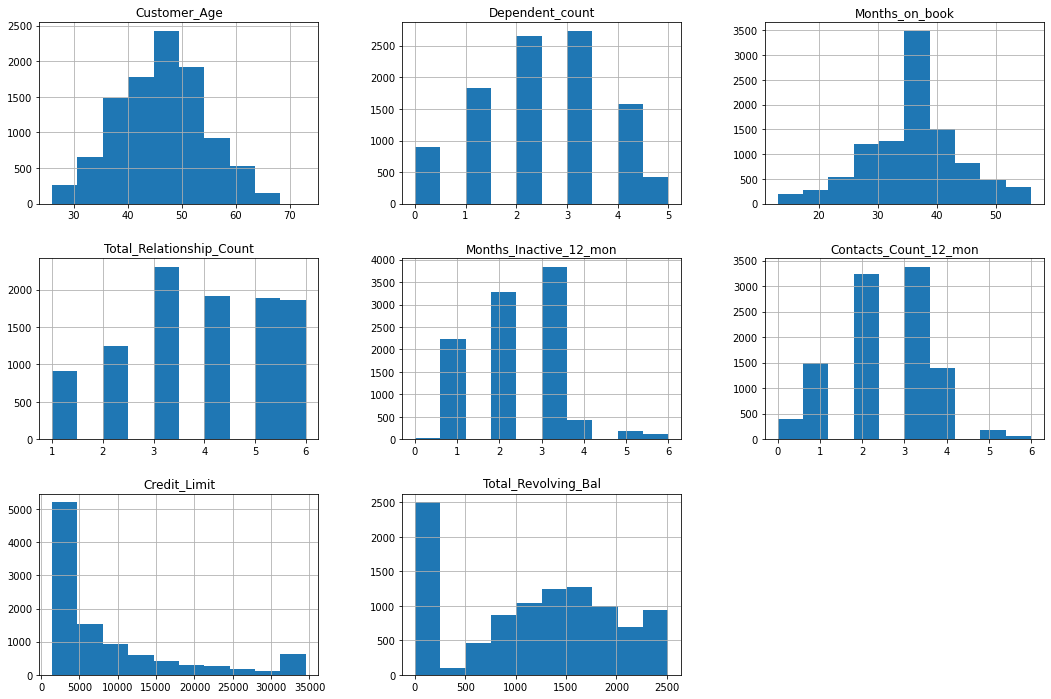

In [ ]:
# sistribution of customer data
data.hist(figsize=(18,12))
plt.show()

[Text(0, 0, 'High School'),
 Text(0, 0, 'Graduate'),
 Text(0, 0, 'Uneducated'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'College'),
 Text(0, 0, 'Post-Graduate')]

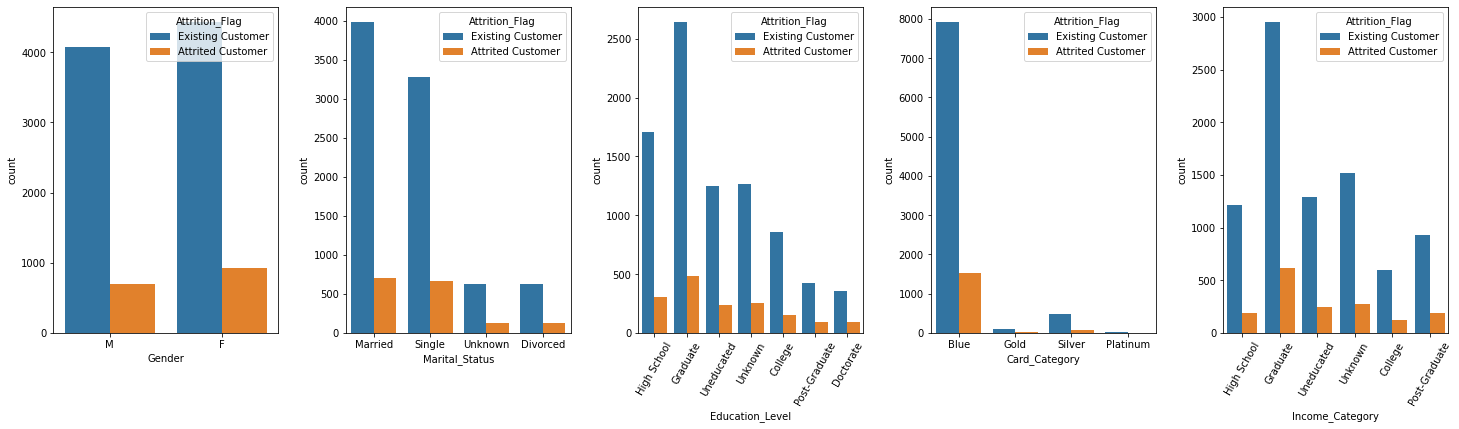

In [ ]:
_, ax = plt.subplots(1, 5, figsize=(25, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "Gender", hue="Attrition_Flag", data = data, ax= ax[0])
sns.countplot(x = "Marital_Status", hue="Attrition_Flag", data = data, ax = ax[1])
a = sns.countplot(x = "Education_Level", hue="Attrition_Flag", data = data, ax = ax[2])
sns.countplot(x = "Card_Category", hue="Attrition_Flag", data = data, ax = ax[3])
b = sns.countplot(x = "Income_Category", hue="Attrition_Flag", data = data, ax = ax[4])
a.set_xticklabels(a.get_xticklabels(), rotation=60)
b.set_xticklabels(a.get_xticklabels(), rotation=60)

In [ ]:
# mapping categorical values to numerical values
encoder = LabelEncoder()

data["Attrition_Flag"] = encoder.fit_transform(data["Attrition_Flag"])
data["Gender"] = encoder.fit_transform(data["Gender"])
data["Education_Level"] = encoder.fit_transform(data["Education_Level"])
data["Income_Category"] = encoder.fit_transform(data["Income_Category"])
data["Card_Category"] = encoder.fit_transform(data["Card_Category"])
data["Marital_Status"] = encoder.fit_transform(data["Marital_Status"])

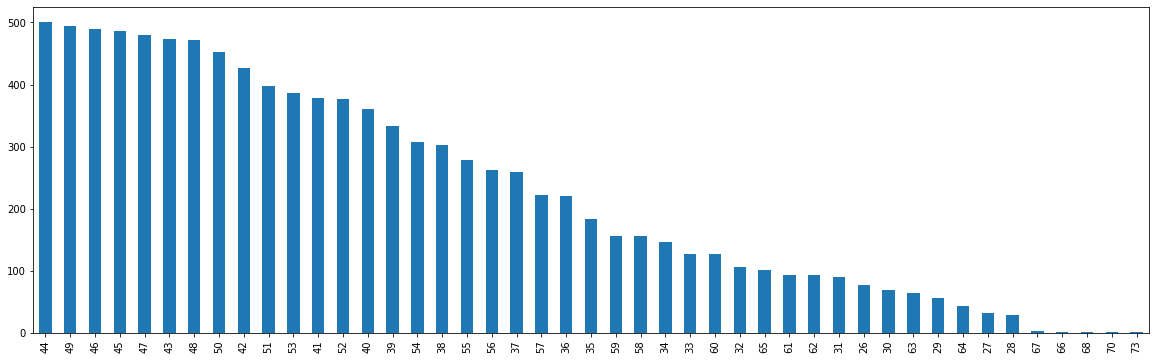

In [ ]:
data["Customer_Age"].value_counts().plot.bar(figsize=(20,6))

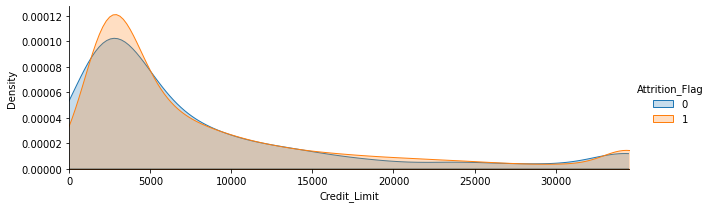

In [ ]:
facet = sns.FacetGrid(data, hue="Attrition_Flag",aspect=3)
facet.map(sns.kdeplot,"Credit_Limit",shade= True)
facet.set(xlim=(0, data["Credit_Limit"].max()))
facet.add_legend()

plt.show()

Feature importances

[1.]


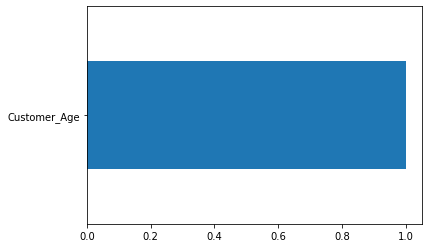

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

x = data.iloc[:, [1]]
y = data.iloc[:, 2:].astype(int)


model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh') 
plt.show()

In [ ]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [ ]:
# X = data.iloc[:, [1, 6, 12, 13]].values
# X

X = data[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal', 'Income_Category',
          'Education_Level', 'Months_Inactive_12_mon', 'Marital_Status']].values
X

array([[4.5000e+01, 1.2691e+04, 7.7700e+02, ..., 3.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.9000e+01, 8.2560e+03, 8.6400e+02, ..., 2.0000e+00, 1.0000e+00,
        2.0000e+00],
       [5.1000e+01, 3.4180e+03, 0.0000e+00, ..., 2.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [4.4000e+01, 5.4090e+03, 0.0000e+00, ..., 3.0000e+00, 3.0000e+00,
        1.0000e+00],
       [3.0000e+01, 5.2810e+03, 0.0000e+00, ..., 2.0000e+00, 3.0000e+00,
        3.0000e+00],
       [4.3000e+01, 1.0388e+04, 1.9610e+03, ..., 2.0000e+00, 2.0000e+00,
        1.0000e+00]])

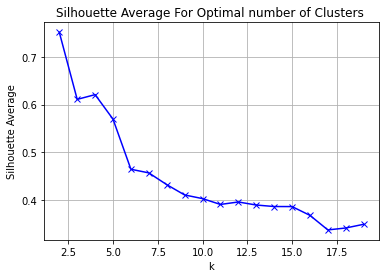

In [ ]:
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

SS_distances= []
I = range(2,20)
for i in I:
       HC = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
       HC= HC.fit(X)
       score_H= metrics.silhouette_score(X, HC.labels_)
       SS_distances.append(score_H)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
#HC = AgglomerativeClustering(distance_threshold=40,n_clusters=None, affinity='euclidean', linkage='ward')

Text(0.5, 1.0, 'Hierarchal Clustering Using 3 Clusters as Threshold')

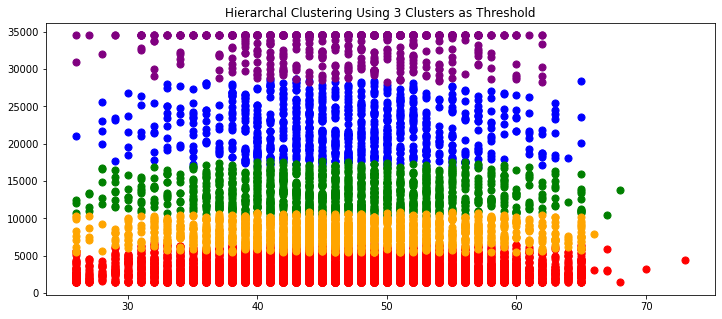

In [ ]:
# Now use optimal Silhouette to choose # clusters which is 5
HC = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
HC.fit(X)
labels = HC.labels_

plt.figure(figsize=(12,5))
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')

plt.title('Hierarchal Clustering Using 3 Clusters as Threshold')
# plt.show()

DBSCAN

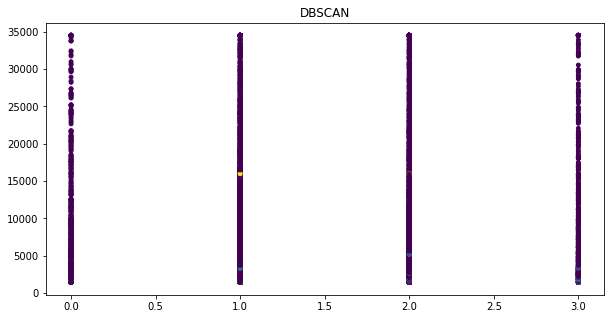

In [ ]:
# DBSCAN using Minpts=4 and eps=8 (curvature)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8, min_samples=4)
dbscan.fit(X)
label = dbscan.labels_
label

plt.figure(figsize=(10,5))
plt.scatter(X[:,-1],X[:,1],c=label,s=15)
plt.title('DBSCAN')
plt.show()

K-means

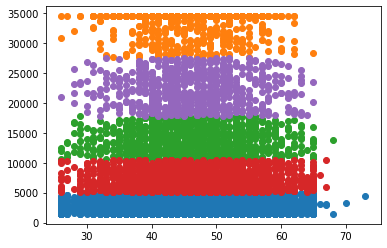

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define dataset

# define the model
model = KMeans(n_clusters=5)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

Determining the optimal Epsilon

Text(0, 0.5, '4th Nearest Neighbours Distance')

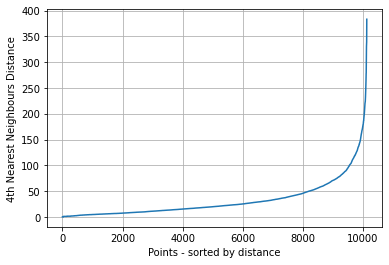

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

# Step 1: Calculate the average distance between each point in the data set and its 20 nearest neighbors (my selected MinPts value)
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Step2: Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlabel('Points - sorted by distance')
plt.ylabel('4th Nearest Neighbours Distance')

The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature. For this model it is 150

In [ ]:
# DBSCAN using Minpts=4 and eps=8 (curvature)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8150, min_samples=4)
dbscan.fit(X)
label = dbscan.labels_
label

array([0, 0, 0, ..., 0, 0, 0])

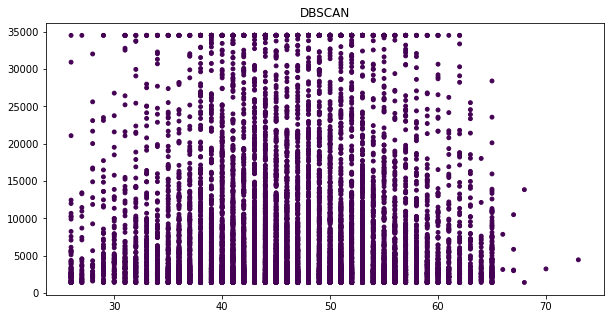

In [ ]:
# plotting DBSCAN clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.title('DBSCAN')
plt.show()

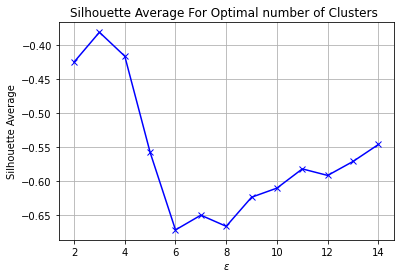

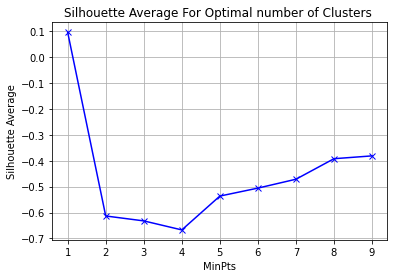

In [ ]:
## Finding epsilon using silhouette

SS_distances= []
I = range(2,15)
for i in I:
       dbscan=DBSCAN(eps=i, min_samples=4)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('$ε$')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()
plt.show()

# Finding Best Nearest Neighbours using e=8


SS_distances= []
I = range(1,10)
for i in I:
       dbscan=DBSCAN(eps=8, min_samples=i)
       dbscan= dbscan.fit(X)
       score_db= metrics.silhouette_score(X, dbscan.labels_)
       SS_distances.append(score_db)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('MinPts')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()

The optimal MinPts is 9 and ε is 3

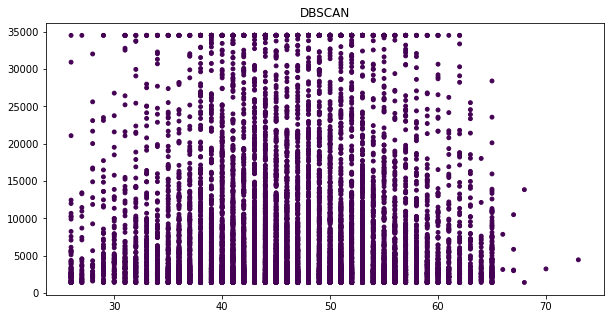

In [ ]:
# Using optimal Minpts and $\epsilon$
dbscan=DBSCAN(eps=3, min_samples=9)
dbscan.fit(X)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.title('DBSCAN')
plt.show()

Optimal K-means Clustering

Text(0.5, 1.0, 'Elbow Method For Optimal k')

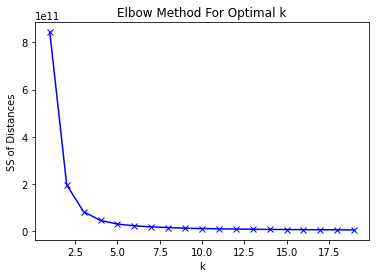

In [ ]:
#Finding Best k using WSSE 
from sklearn.cluster import KMeans
SS_distances= []
I = range(1,20)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       SS_distances.append(k_means.inertia_)
   


centers = k_means.cluster_centers_

# plotting SSE distances (for each point to the nearest Center) versus number of k 
plt.plot(I, SS_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SS of Distances')
plt.title('Elbow Method For Optimal k')

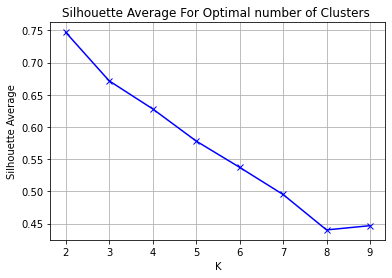

In [ ]:
# Finding Bets K using Silhouette Ave
SS_distances= []
I = range(2,10)
for i in I:
       k_means = KMeans(n_clusters=i)
       k_means= k_means.fit(X)
       score_kmean= metrics.silhouette_score(X, k_means.labels_)
       SS_distances.append(score_kmean)

# plotting Silhouette for different clusters

plt.plot(I, SS_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Average')
plt.title('Silhouette Average For Optimal number of Clusters ')    
plt.grid()

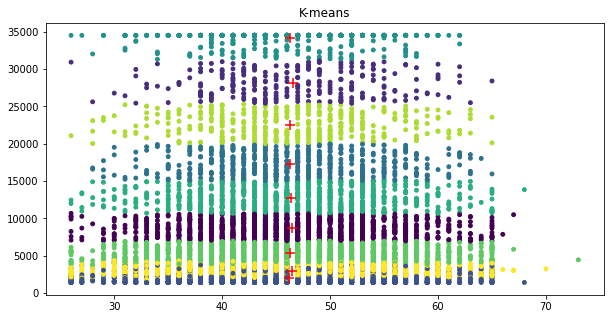

In [ ]:
# Train k_means using optimal number of clusters
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=9)
k_means= k_means.fit(X)


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.title('K-means')
plt.show()

The best clustering algorithm in this case is K-means. The clusters in K-means are better separated and distinct than in DBSCAN

PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=14)
pca.fit(data)

# pca variance ratio
pca.explained_variance_ratio_

array([9.92036329e-01, 7.96197598e-03, 1.37561560e-06, 1.62321369e-07,
       4.04394600e-08, 2.91112540e-08, 2.65145642e-08, 1.98263767e-08,
       1.45979639e-08, 1.21133764e-08, 6.52405026e-09, 4.42315547e-09,
       1.72913781e-09, 1.35838347e-09])

variance ratio is the percentage of variance that is attributed by each of the selected components. Ideally, you would choose the number of components to include in your model by adding the explained variance ratio of each component until you reach a total of around 0.8 to avoid overfitting

From the ratios above 4 dimensions can be omitted without having a significant effect on the model

In [ ]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=9)
k_means= k_means.fit(X)


# Plot Clusters and their centers

label = k_means.labels_
centers = k_means.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=label,s=15)
plt.scatter(centers[:,0], centers[:,1], color ='red', marker='+', s=100) 
plt.title('K-means')
plt.show()

3D plot

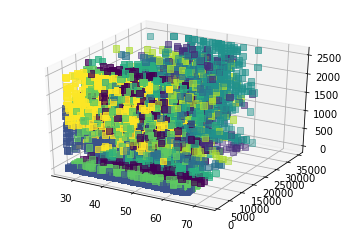

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x, y, z = zip(*data[['Customer_Age', 'Credit_Limit', 'Total_Revolving_Bal']])

x = data.Customer_Age
y = data.Credit_Limit
z = data.Total_Revolving_Bal

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, marker="s", c=label, s=40)
plt.show()